In [1]:
from os import system as bash
from pyspark.sql import SparkSession
from splicemachine.spark import PySpliceContext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.types import TimestampType
from datetime import datetime

In [2]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
splice = PySpliceContext(spark)

In [3]:
SCHEMA = 'AGUPTA'
TABLE = 'january'

In [4]:
df = splice.df("select MMSI from AGUPTA.january")
unique = df.distinct()
unique_mmsi = unique.toPandas()

In [5]:
mmsi = unique_mmsi['MMSI'][20]
print(mmsi)
df = splice.df("select BaseDateTime, Lon, Lat, VesselName from AGUPTA.january where MMSI = " + mmsi)
print(df.count())

338124000
27296


In [45]:
dates = df.toPandas()
dates = dates.sort_values(by=['BASEDATETIME'])
print(len(dates))

27296


In [46]:
datelist = list(dates['BASEDATETIME'])
print(datelist[0], datelist[-1])
name = set(list(dates['VESSELNAME']))
print(name)

2019-01-02T10:13:53 2019-01-31T23:59:50
{'DON ALFREDO'}


In [61]:
#Creating datetime objects
datetime_objects = []
for date in datelist:
    datetime_objects.append(datetime.strptime(date, '%Y-%m-%dT%X'))

In [47]:
latitude = list(dates['LAT'])
longitude = list(dates['LON'])
latitude = [float(lat) for lat in latitude]
longitude = [float(long) for long in longitude]
print(max(latitude), min(latitude))
print(max(longitude), min(longitude))

18.50087 18.01594
-65.56016 -66.13109


In [115]:
####getting speeds
speeds_lat = []
speeds_long = []
for i in range(1, len(latitude)):
    time = (datetime_objects[i] - datetime_objects[i-1]).seconds
    if time != 0:
        #converting speeds into degrees per hour
        speeds_lat.append(((latitude[i] - latitude[i-1])/time) * 60 * 60)
        speeds_long.append(((longitude[i] - longitude[i-1])/time) * 60 * 60)
    else:
        speeds_lat.append(speeds_lat[-1])
        speeds_long.append(speeds_long[-1])

In [116]:
n = np.arange(400)

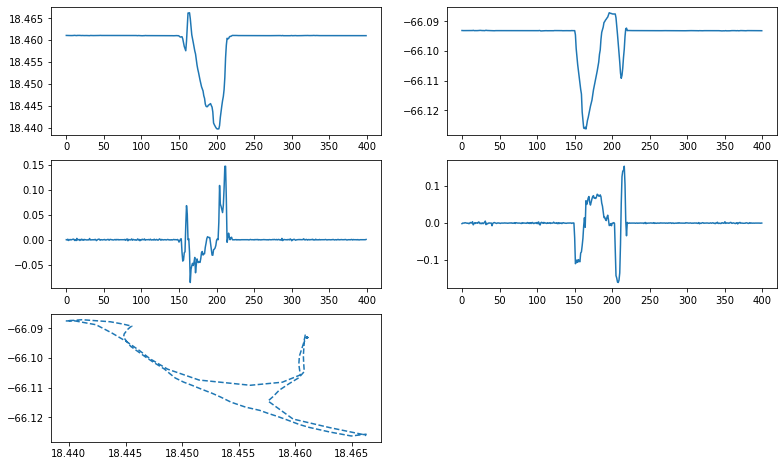

In [117]:
fig = plt.figure(figsize = (13,8))

plt.subplot(3, 2, 1)
plt.plot(np.array(latitude)[n])

plt.subplot(3, 2, 2)
plt.plot(np.array(longitude)[n])

plt.subplot(3, 2, 3)
plt.plot(np.array(speeds_lat)[n])

plt.subplot(3, 2, 4)
plt.plot(np.array(speeds_long)[n])

plt.subplot(3, 2, 5)
plt.plot(np.array(latitude)[n], np.array(longitude)[n], '--')

plt.show()